In [1]:
from itertools import pairwise, permutations
from typing import Generator

In [ ]:
def find_graceful_undirected_cycles(
    n_vertices: int,
) -> Generator[tuple[int, ...], None, None]:
    n_edges = n_vertices
    start = 0
    for perm in permutations(range(start + 1, n_edges + 1), n_vertices - 1):
        cycle = [start] + list(perm) + [start]
        labelling = {abs(x - y) for x, y in pairwise(cycle)}
        if labelling == set(range(1, n_edges + 1)):
            yield tuple(cycle[:-1])

In [11]:
for cycle in find_graceful_undirected_cycles(4):
    print(cycle)

(0, 2, 1, 4)
(0, 3, 2, 4)
(0, 4, 1, 2)
(0, 4, 2, 3)


In [ ]:
def find_graceful_undirected_cycles(
    n_vertices: int,
) -> Generator[tuple[int, ...], None, None]:
    n_edges = n_vertices
    start = 0
    for perm in permutations(range(start + 1, n_edges), n_vertices - 2):
        cycle = [start] + list(perm) + [n_edges]
        labelling = {abs(x - y) for x, y in pairwise(cycle)}
        if labelling == set(range(1, n_edges)):
            yield tuple(cycle)
            yield tuple(reversed(cycle))

In [15]:
for cycle in find_graceful_undirected_cycles(12):
    print(cycle)

(0, 5, 4, 8, 6, 9, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 9, 6, 8, 4, 5, 0)
(0, 5, 7, 4, 8, 9, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 9, 8, 4, 7, 5, 0)
(0, 6, 5, 7, 4, 8, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 8, 4, 7, 5, 6, 0)
(0, 6, 7, 4, 9, 5, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 5, 9, 4, 7, 6, 0)
(0, 6, 7, 9, 5, 8, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 8, 5, 9, 7, 6, 0)
(0, 6, 8, 5, 9, 4, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 4, 9, 5, 8, 6, 0)
(0, 6, 8, 9, 4, 7, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 7, 4, 9, 8, 6, 0)
(0, 6, 9, 4, 5, 7, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 7, 5, 4, 9, 6, 0)
(0, 6, 9, 5, 7, 8, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 8, 7, 5, 9, 6, 0)
(0, 7, 3, 5, 6, 9, 4, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 4, 9, 6, 5, 3, 7, 0)
(0, 7, 3, 5, 8, 9, 4, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 4, 9, 8, 5, 3, 7, 0)
(0, 7, 3, 6, 8, 9, 4, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 4, 9, 8, 6, 3, 7, 0)
(0, 7, 3, 8, 5, 6, 4, 10, 2, 11, 1, 12)


In [18]:
def find_graceful_undirected_cycles(
    n_vertices: int,
) -> Generator[tuple[int, ...], None, None]:
    n_edges = n_vertices
    start = 0

    def recurse(vertex_labels: list[int]) -> Generator[list[int], None, None]:
        if len(vertex_labels) == n_vertices - 1:
            yield vertex_labels
        edge_labels = {abs(x - y) for x, y in pairwise(vertex_labels)}
        other_labels = [
            label for label in range(1, n_edges) if label not in vertex_labels
        ]
        for label in other_labels:
            if abs(label - vertex_labels[-1]) not in edge_labels:
                yield from recurse(vertex_labels + [label])

    for vertex_labels in recurse([start]):
        cycle_labels = vertex_labels + [n_edges]
        edge_labels = {abs(x - y) for x, y in pairwise(cycle_labels)}
        if edge_labels == set(range(1, n_edges)):
            yield tuple(cycle_labels)
            yield tuple(reversed(cycle_labels))

In [23]:
for cycle in find_graceful_undirected_cycles(12):
    print(cycle)

(0, 5, 4, 8, 6, 9, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 9, 6, 8, 4, 5, 0)
(0, 5, 7, 4, 8, 9, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 9, 8, 4, 7, 5, 0)
(0, 6, 5, 7, 4, 8, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 8, 4, 7, 5, 6, 0)
(0, 6, 7, 4, 9, 5, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 5, 9, 4, 7, 6, 0)
(0, 6, 7, 9, 5, 8, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 8, 5, 9, 7, 6, 0)
(0, 6, 8, 5, 9, 4, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 4, 9, 5, 8, 6, 0)
(0, 6, 8, 9, 4, 7, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 7, 4, 9, 8, 6, 0)
(0, 6, 9, 4, 5, 7, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 7, 5, 4, 9, 6, 0)
(0, 6, 9, 5, 7, 8, 3, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 3, 8, 7, 5, 9, 6, 0)
(0, 7, 3, 5, 6, 9, 4, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 4, 9, 6, 5, 3, 7, 0)
(0, 7, 3, 5, 8, 9, 4, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 4, 9, 8, 5, 3, 7, 0)
(0, 7, 3, 6, 8, 9, 4, 10, 2, 11, 1, 12)
(12, 1, 11, 2, 10, 4, 9, 8, 6, 3, 7, 0)
(0, 7, 3, 8, 5, 6, 4, 10, 2, 11, 1, 12)


In [ ]:
def find_graceful_directed_cycles(
    n_vertices: int,
) -> Generator[tuple[int, ...], None, None]:
    n_edges = n_vertices
    for start in (0, 1):
        for perm in permutations(range(start + 1, n_edges + 1), n_vertices - 1):
            cycle = [start] + list(perm) + [start]
            labelling = {(y - x) % (n_edges + 1) for x, y in pairwise(cycle)}
            if labelling == set(range(1, n_edges + 1)):
                yield tuple(cycle[:-1])

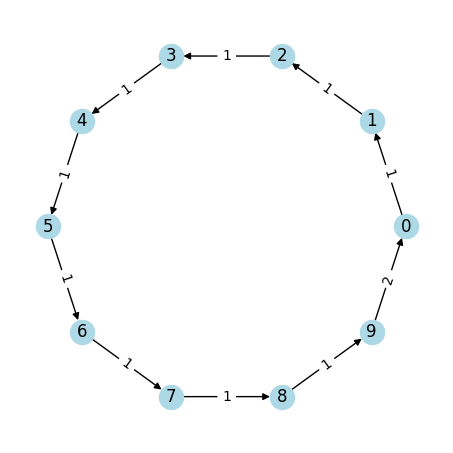

In [4]:
from graphs import CycleGraph

CycleGraph.from_int(10).draw()